### Importing libraries and data

In [171]:
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
del data_dict['TOTAL'] # Not sure why this was in the dataset in the first place, but deleting this before proceeding further
df = pd.DataFrame.from_dict(data_dict,orient='index')

### Data basics

In [172]:
### Get basic statistics about data set 

## No. of records 
print 'Total # of records: ' + str(len(df))
print 'Total # of POI: ' + str(sum(df['poi']==True))

## Missing values by variable 
df.replace("NaN", np.nan, inplace=True) # properly encode null values 
df.isnull().sum() 

Total # of records: 145
Total # of POI: 18


salary                        51
to_messages                   59
deferral_payments            107
total_payments                21
exercised_stock_options       44
bonus                         64
restricted_stock              36
shared_receipt_with_poi       59
restricted_stock_deferred    128
total_stock_value             20
expenses                      51
loan_advances                142
from_messages                 59
other                         53
from_this_person_to_poi       59
poi                            0
director_fees                129
deferred_income               97
long_term_incentive           80
email_address                 34
from_poi_to_this_person       59
dtype: int64

In [173]:
### Drop email address and loan advances 
del df['email_address'] # cannot use as predictor as it identifies individual 
del df['loan_advances'] # only 3 data points has loan advances info 

### Data exploration 

In [174]:
email_features = ['to_messages', 'from_messages', 'from_this_person_to_poi', 
                  'from_poi_to_this_person', 'shared_receipt_with_poi']
df[email_features].describe()

,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
count,86.000000,86.000000,86.000000,86.000000,86.000000
mean,2073.860465,608.790698,41.232558,64.895349,1176.465116
std,2582.700981,1841.033949,100.073111,86.979244,1178.317641
min,57.000000,12.000000,0.000000,0.000000,2.000000
25%,541.250000,22.750000,1.000000,10.000000,249.750000
50%,1211.000000,41.000000,8.000000,35.000000,740.500000
75%,2634.750000,145.500000,24.750000,72.250000,1888.250000
max,15149.000000,14368.000000,609.000000,528.000000,5521.000000


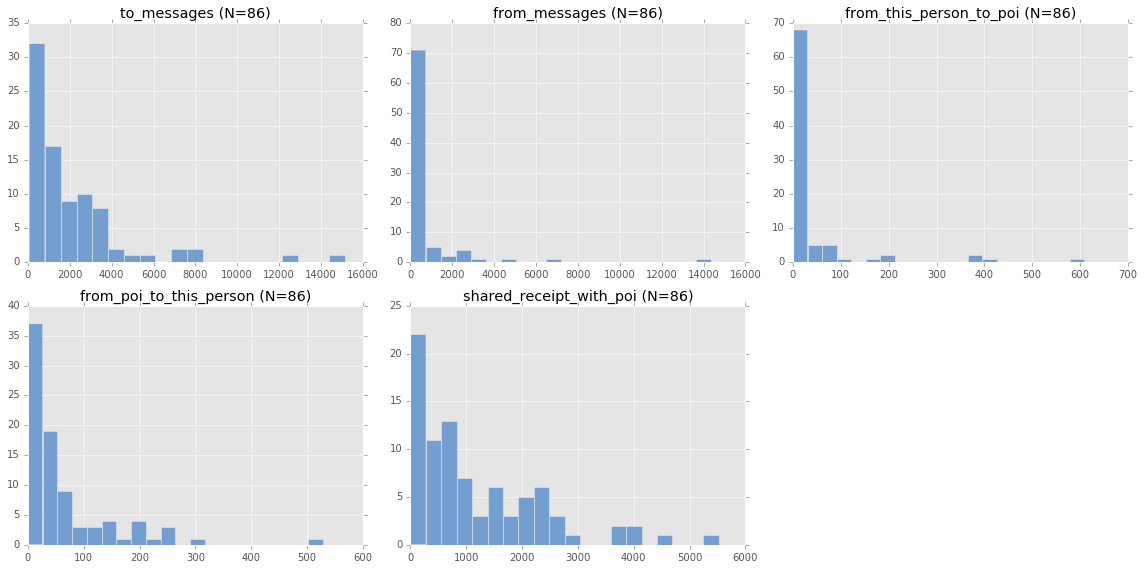

In [175]:
%matplotlib inline
plt.figure(figsize=(16,8))

data = df[email_features]

for i, j in zip(range(len(data.columns)), data.columns):
    plot_no = 231 + i 
    plt.subplot(plot_no)
    plt.hist(data[~np.isnan(df[j])][j], bins=20, color = (0.45,0.62,0.81))
    plt.title('%s (N=%d)' % (j, data[j].count()))    

plt.tight_layout()

In [176]:
payments_features = ['salary', 'bonus','long_term_incentive', 'deferred_income', 'deferral_payments', 
                     'other', 'expenses', 'director_fees','total_payments']
df[payments_features].describe()

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,other,expenses,director_fees,total_payments
count,94.000000,81.000000,65.000000,48.000000,38.000000,92.000000,94.000000,16.000000,1.240000e+02
mean,284087.542553,1201773.074074,746491.200000,-581049.812500,841602.526316,465276.663043,54192.010638,89822.875000,2.623421e+06
std,177131.115377,1441679.438330,862917.421568,942076.402972,1289322.626180,1389719.064851,46108.377454,41112.700735,9.488106e+06
min,477.000000,70000.000000,69223.000000,-3504386.000000,-102500.000000,2.000000,148.000000,3285.000000,1.480000e+02
25%,211802.000000,425000.000000,275000.000000,-611209.250000,79644.500000,1209.000000,22479.000000,83674.500000,3.863802e+05
50%,258741.000000,750000.000000,422158.000000,-151927.000000,221063.500000,51984.500000,46547.500000,106164.500000,1.100246e+06
75%,308606.500000,1200000.000000,831809.000000,-37926.000000,867211.250000,357577.250000,78408.500000,112815.000000,2.084663e+06
max,1111258.000000,8000000.000000,5145434.000000,-833.000000,6426990.000000,10359729.000000,228763.000000,137864.000000,1.035598e+08


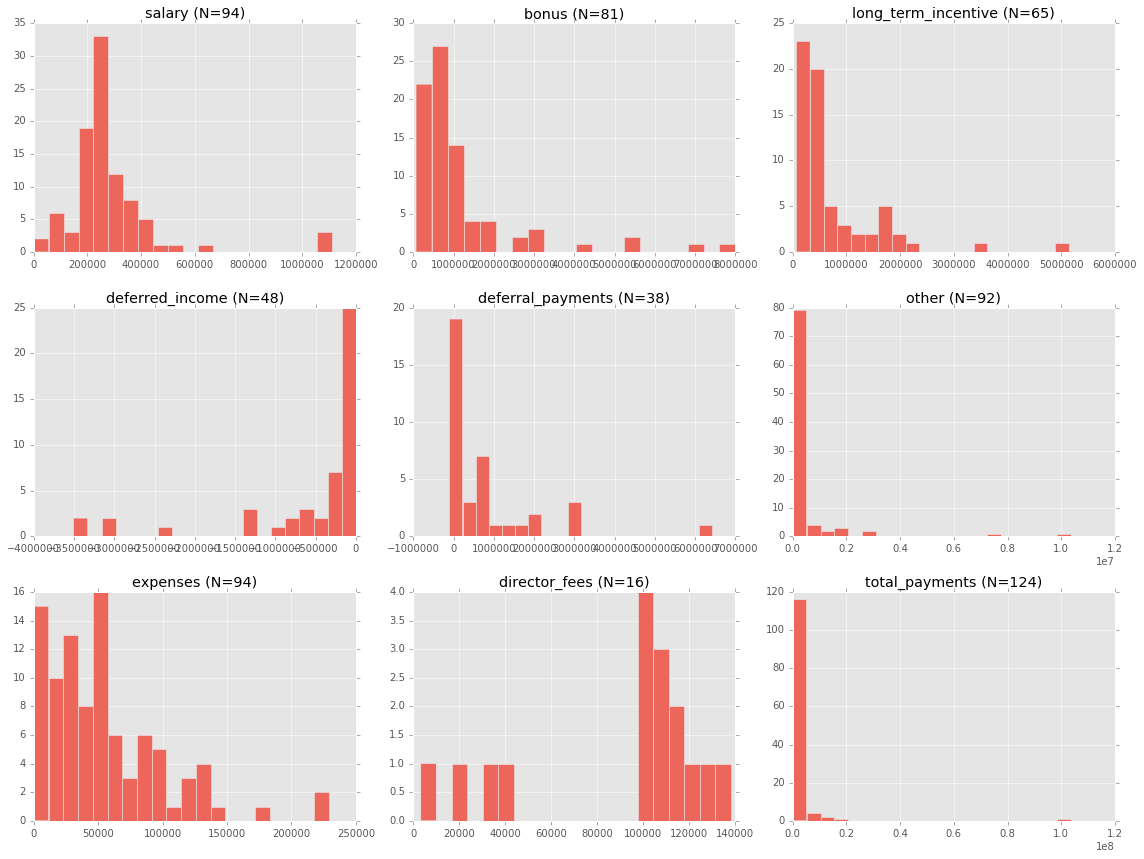

In [177]:
plt.figure(figsize=(16,12))

data = df[payments_features]

for i, j in zip(range(len(data.columns)), data.columns):
    plot_no = 331 + i 
    plt.subplot(plot_no)
    plt.hist(data[~np.isnan(df[j])][j], bins=20, color = (0.93,0.4,0.36))
    plt.title('%s (N=%d)' % (j, data[j].count()))    

plt.tight_layout()

In [178]:
stock_features = ['exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value']
df[stock_features].describe()

,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
count,101.000000,109.000000,17.000000,125.000000
mean,2959559.257426,1147424.091743,621892.823529,3352073.024000
std,5499449.598994,2249770.356903,3845528.349509,6532883.097201
min,3285.000000,-2604490.000000,-1787380.000000,-44093.000000
25%,506765.000000,252055.000000,-329825.000000,494136.000000
50%,1297049.000000,441096.000000,-140264.000000,1095040.000000
75%,2542813.000000,985032.000000,-72419.000000,2606763.000000
max,34348384.000000,14761694.000000,15456290.000000,49110078.000000


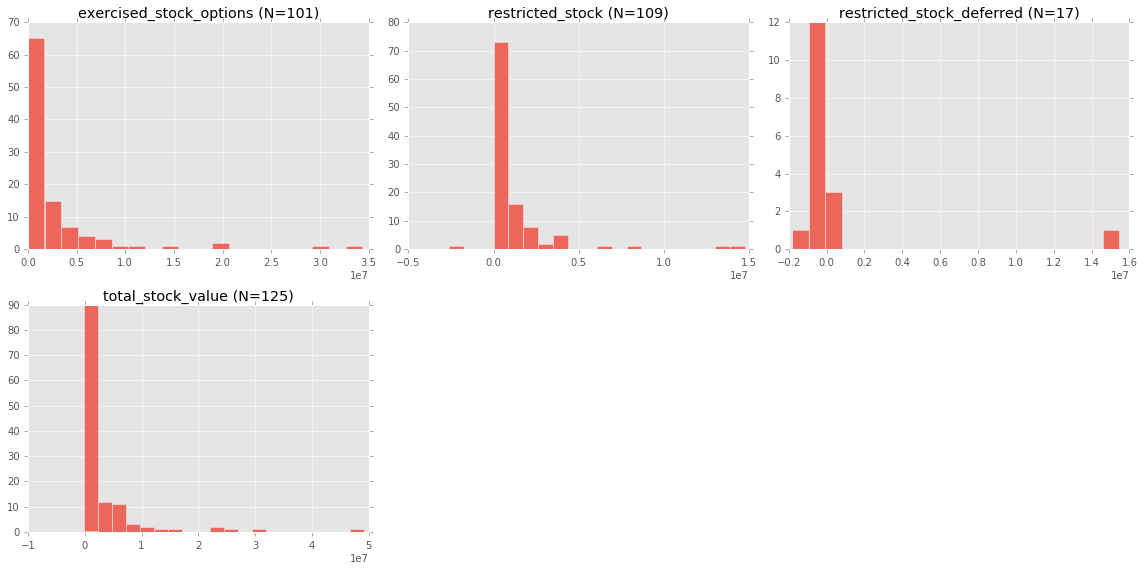

In [180]:
plt.figure(figsize=(16,8))

data = df[stock_features]

for i, j in zip(range(len(data.columns)), data.columns):
    plot_no = 231 + i 
    plt.subplot(plot_no)
    plt.hist(data[~np.isnan(df[j])][j], bins=20, color = (0.93,0.4,0.36))
    plt.title('%s (N=%d)' % (j, data[j].count()))    

plt.tight_layout()

### Imputing missing values 

There are two types of missing values in our dataset:  

As observed earlier, we only had email information for 86 of the 145 personnel. This leaves 59 records with no email information. Since many of machine learning methods we will be employing later cannot deal with missing values, we will impute the missing values of email variables with their respective medians. 

The other type of missing values are in the financial variables, information transcribed from the insider pay PDF. On a cursory glance, one might think that missing values simply imply zero in these cases. After all, one would not expect everyone to have received 'loan advances', or 'director fees' for instance. While this seems reasonable for most of the financial variables, the fact that we have missing 'salary' information for some causes pause. Obviously, everyone should have a salary, and particularly for this group of people, 'bonus' as well. I am inclined to drop these records, but since they make up more than one-third of our records, I decided against it. Instead, I backfilled missing salary and bonus information with their respective medians (as with the email variables), and filled the remaining missing financial information with zeros. 

In [169]:
# Impute missing email information using medians 
features_imputed = ['to_messages', 'from_messages', 'from_this_person_to_poi', 'from_poi_to_this_person', 
                    'shared_receipt_with_poi', 'salary', 'bonus']
for variable in features_imputed: 
    df[variable] = np.where(np.isnan(df[variable]), 
                            np.median(df[~np.isnan(df[variable])][variable]), df[variable])
    
# Replace all NaN's in non-Salary/Bonus financial variables 
features_zeroed = ['long_term_incentive', 'deferred_income', 'deferral_payments', 'other', 
                   'expenses', 'director_fees','total_payments', 'exercised_stock_options', 
                   'restricted_stock', 'restricted_stock_deferred', 'total_stock_value'] 
for variable in features_zeroed: 
    df[variable] = np.where(np.isnan(df[variable]),0,df[variable])

### Addressing outliers

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119fa6910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c019350>]], dtype=object)

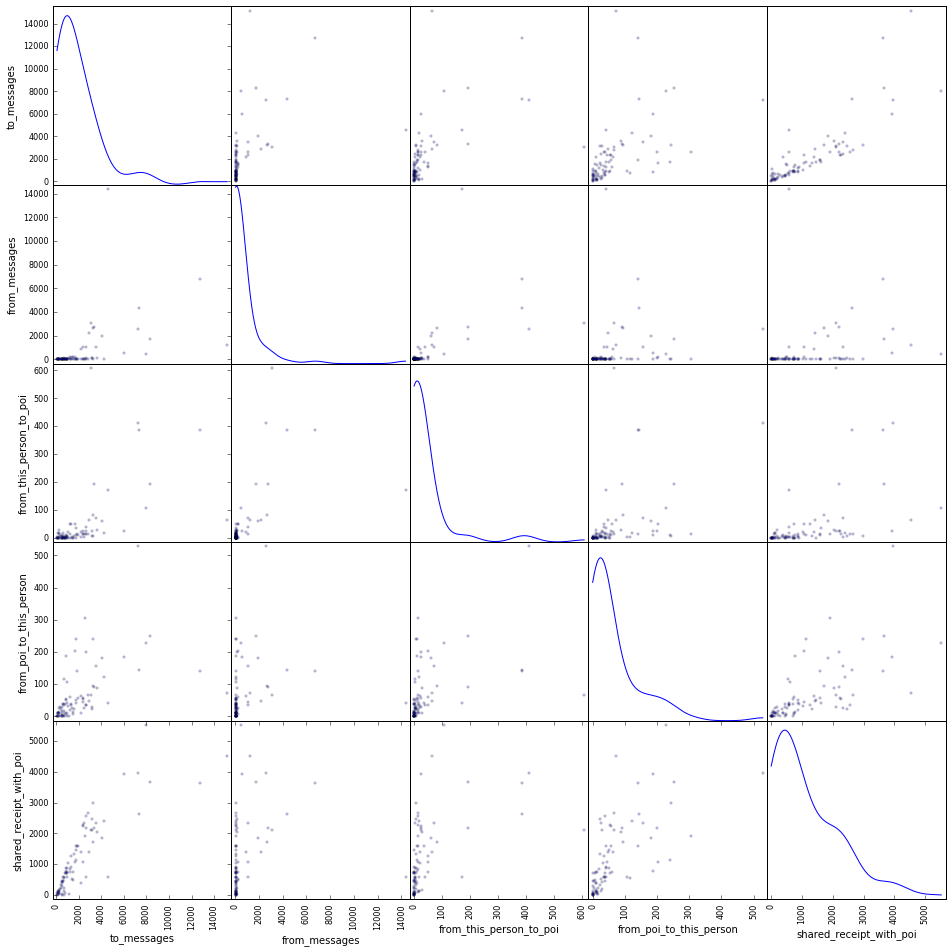

In [26]:
### Scatterplot matrix for email features

% pylab inline 

from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[email_features], alpha=0.2, figsize=(16, 16), diagonal='kde')

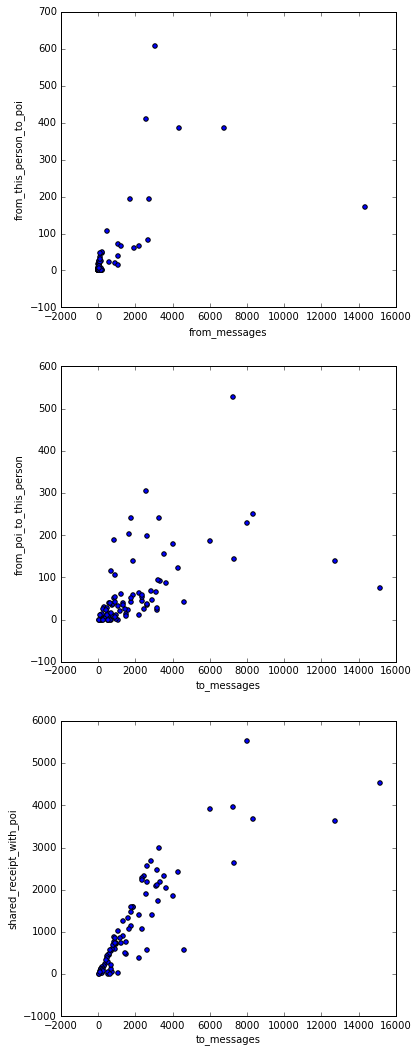

In [27]:
### Analyze specific email scatterplots of interest

fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(18)
fig.set_figwidth(6)

df_to_poi = df[['from_this_person_to_poi','from_messages','poi']].dropna()
df_to_poi.plot(kind='scatter',x='from_messages',y='from_this_person_to_poi',ax=axes[0])

df_from_poi = df[['from_poi_to_this_person','to_messages']].dropna()
df_from_poi.plot(kind='scatter',x='to_messages',y='from_poi_to_this_person',ax=axes[1])

df_shared = df[['shared_receipt_with_poi','to_messages']].dropna()
df_shared.plot(kind='scatter',x='to_messages',y='shared_receipt_with_poi',ax=axes[2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c80a210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e361f50>]], dtype=object)

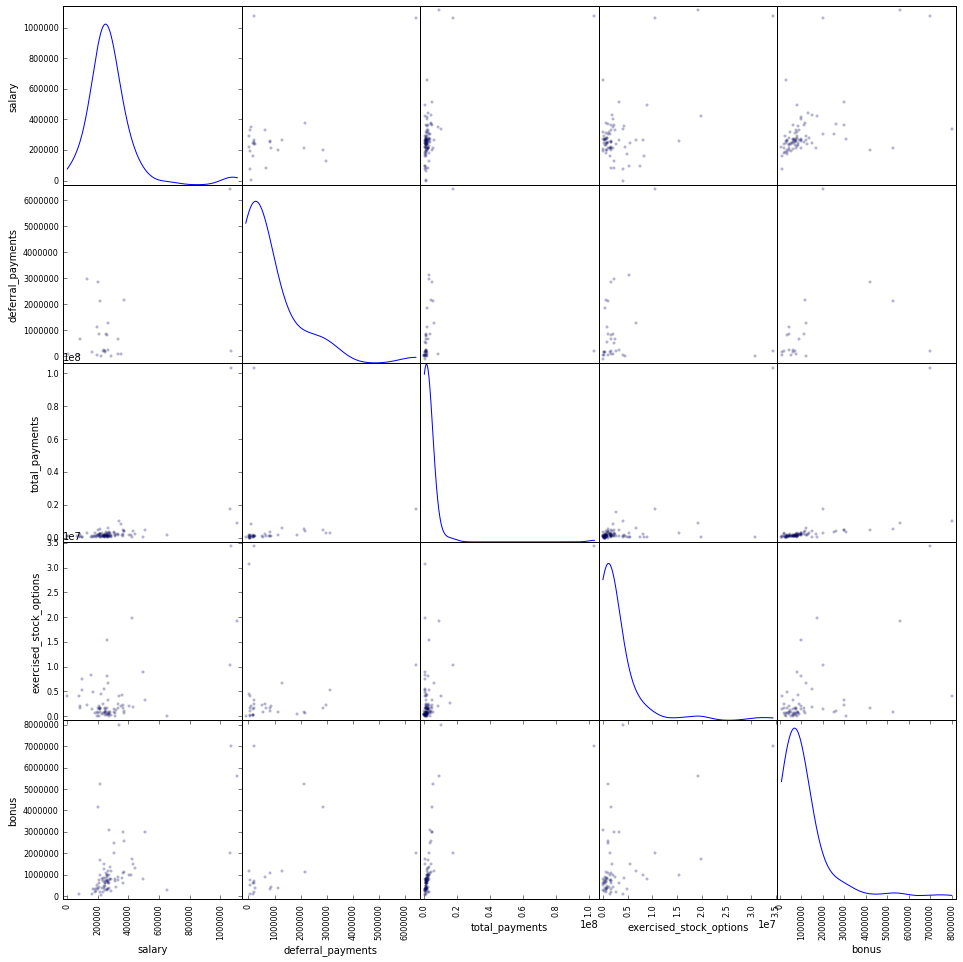

In [28]:
### Scatterplot matrix for financial features (1) 

scatter_matrix(df[financial_features1], alpha=0.2, figsize=(16, 16), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f460a10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1227715d0>]], dtype=object)

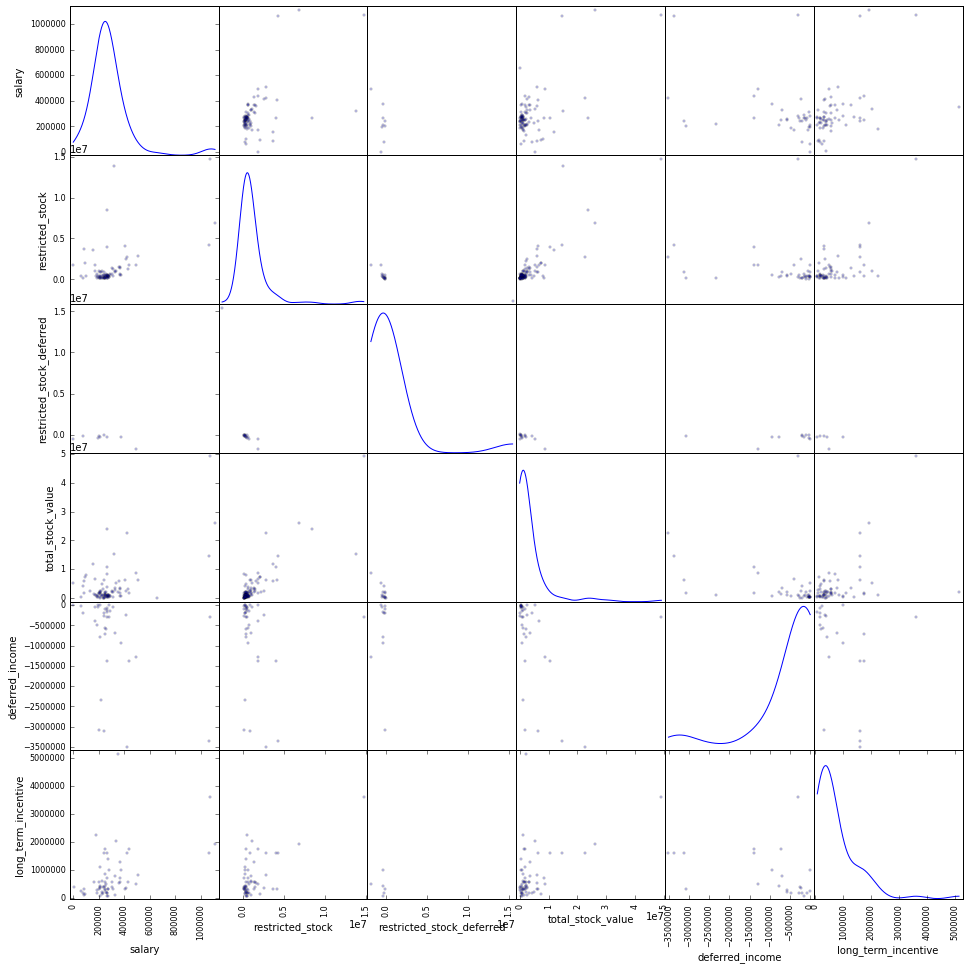

In [29]:
### Scatterplot matrix for financial features (2) 

scatter_matrix(df[financial_features2], alpha=0.2, figsize=(16, 16), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123128850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124edf210>]], dtype=object)

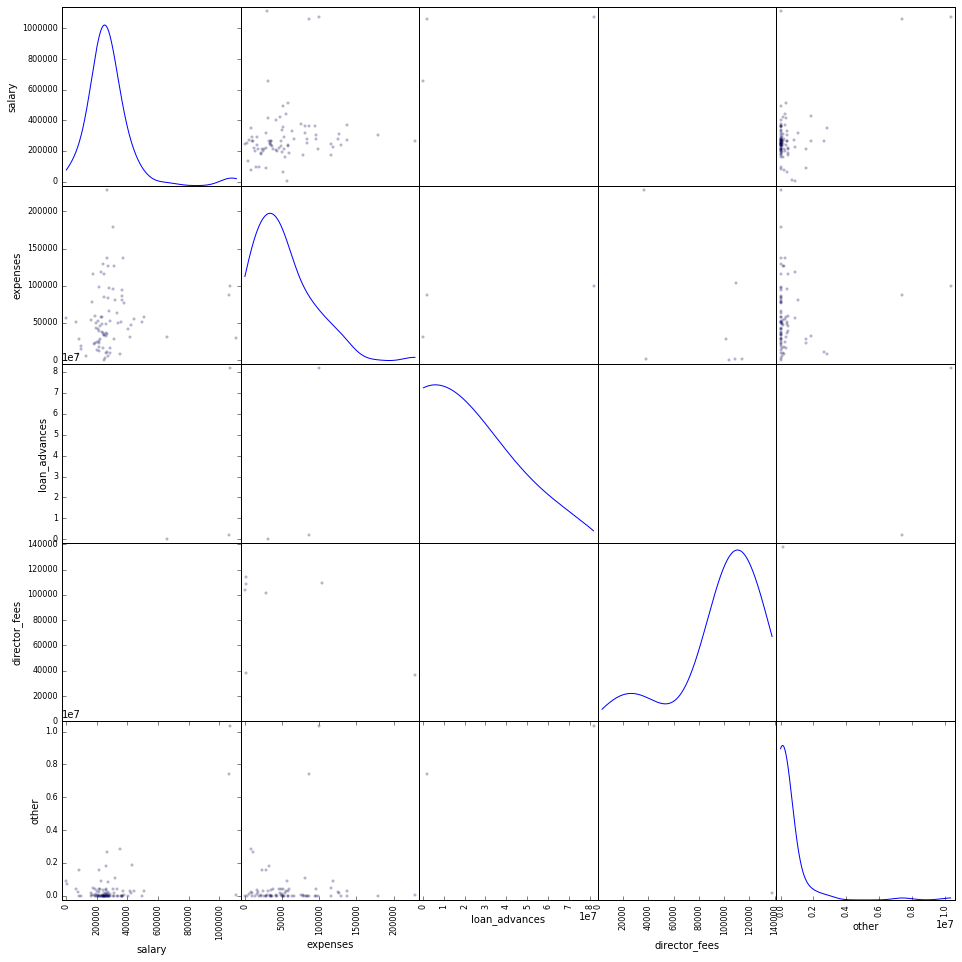

In [30]:
### Scatterplot matrix for financial features (3) 

scatter_matrix(df[financial_features3], alpha=0.2, figsize=(16, 16), diagonal='kde')

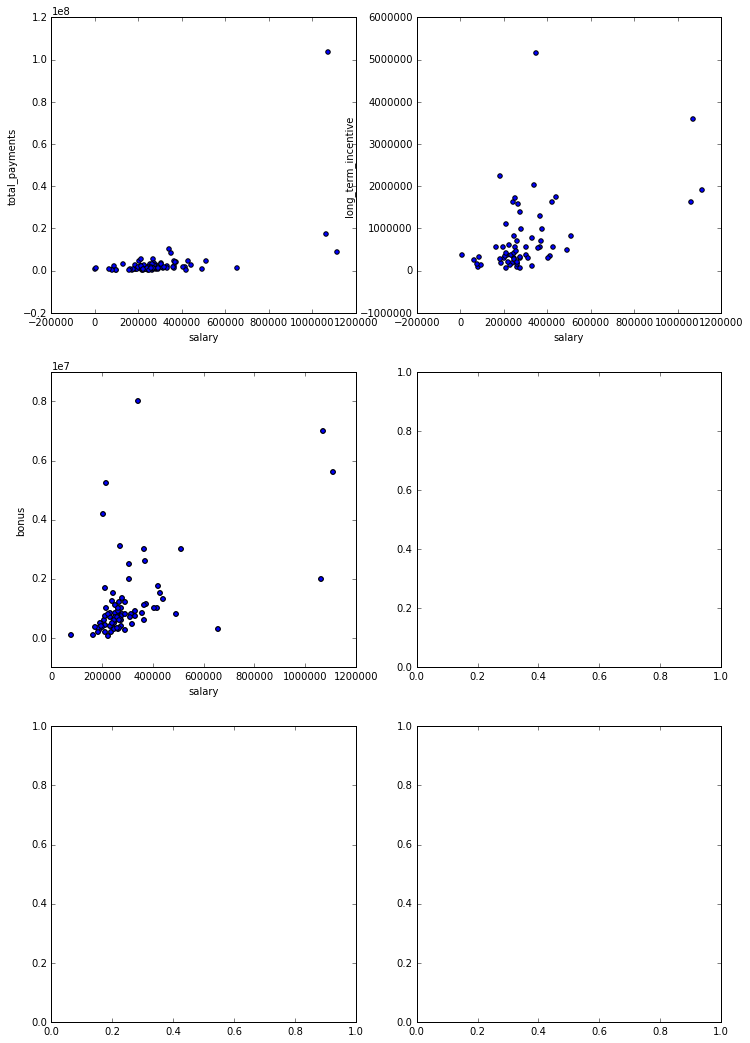

In [31]:
### Analyze specific financial scatterplots of interest

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(18)
fig.set_figwidth(12)

df_salary_total_payments = df[['salary','total_payments']].dropna()
df_salary_total_payments.plot(kind='scatter',x='salary',y='total_payments',ax=axes[0,0])

df_salary_LT_incentive = df[['salary','long_term_incentive']].dropna()
df_salary_LT_incentive.plot(kind='scatter',x='salary',y='long_term_incentive',ax=axes[0,1])

df_salary_bonus = df[['salary','bonus']].dropna()
df_salary_bonus.plot(kind='scatter',x='salary',y='bonus',ax=axes[1,0])

df_salary_bonus = df[['salary','bonus']].dropna()
df_salary_bonus.plot(kind='scatter',x='salary',y='bonus',ax=axes[1,0])

# References

http://stackoverflow.com/questions/7941207/is-there-a-function-to-make-scatterplot-matrices-in-matplotlib